In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from adam_prepare import titanic_pipeline

Let's retrieve our data using the titanic pipeline. Now including a function to create dummy variables!

In [3]:
train, val, test = titanic_pipeline()
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


Let's define a simple function to split our subsets into X and y.

In [4]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

We can call this function to split apart our data efficiently.

In [5]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


Let's create an instance of the [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model with default hyperparameters.

In [6]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

How does it perform on the two subsets?

In [7]:
knn.score(X_train, y_train), knn.score(X_val, y_val)

(0.8073836276083467, 0.7014925373134329)

Not generalizing too well..

Now let's try with scaling!

First, we have to create an instance of the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn.

Once we have the scaling object, we will fit_transform our X_train dataset.  
We will only TRANSFORM the X_val dataset, since we don't want to learn any parameters from it.

In [8]:
mms = MinMaxScaler()

X_train[['age', 'fare']] = mms.fit_transform(X_train[['age', 'fare']])
X_val[['age', 'fare']] = mms.transform(X_val[['age', 'fare']])

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0.233476,1,0,0.103644,0,1,1,0,0,0,0,1
45,0.359135,0,0,0.015713,1,1,0,0,1,0,0,1
28,0.359135,0,0,0.015379,1,0,0,0,1,0,1,0
633,0.359135,0,0,0.000000,1,1,1,0,0,0,0,1
403,0.346569,1,0,0.030937,0,1,0,0,1,0,0,1


Let's try again, this time with our scaled data.

In [9]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_train, y_train), knn.score(X_val, y_val)

(0.8619582664526485, 0.8208955223880597)

Our results have been improved tremendously!! Now let's try reducing the dimensionality of our data to see if that has any impact..

In [11]:
X_train_short = X_train.iloc[:, :-5]
X_val_short = X_val.iloc[:, :-5]

X_train_short.head()

,age,sibsp,parch,fare,alone,sex_male,class_First
748,0.233476,1,0,0.103644,0,1,1
45,0.359135,0,0,0.015713,1,1,0
28,0.359135,0,0,0.015379,1,0,0
633,0.359135,0,0,0.000000,1,1,1
403,0.346569,1,0,0.030937,0,1,0


In [12]:
knn = KNeighborsClassifier()

knn.fit(X_train_short, y_train)

knn.score(X_train_short, y_train), knn.score(X_val_short, y_val)

(0.8330658105939005, 0.8731343283582089)

Reducing the dimensionality of our data negatively impacted our performance on the train dataset.

However, it led to an improvemeny on yhr out-of-sample data!

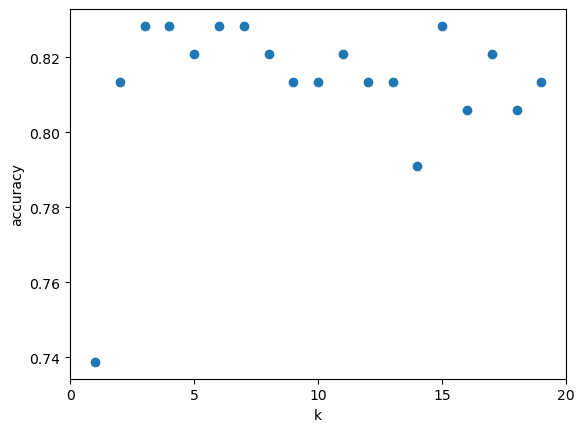

In [14]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_val, y_val))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [ ]:
for i in range(3, 13, 2):
    #pick add odd number if you pick a binary classification there will be a outright winner; you can determine what would be the best number of neighbours to ask
    
    